## MinHeap Implementation

In [169]:
class MinHeap:
    """
    MODIFIED FROM CODE CELL 1, PCW 7.2
        A class that implements properties and methods that support a min priority queue data structure

    Attributes
   ----------
   heap : arr
       A Python list where key values in the min heap are stored
    """
    def __init__(self):
        """
        Sets the attributes
        """
        self.heap = []

    def left(self, i):
        """
        :param i, integer, the index of the parent node
        :return the index of the left child
        """
        left_child = 2 * i + 1
        if left_child < len(self.heap):
            return left_child
        return None

    def right(self, i):
        """
        :param i, integer, the index of the parent node
        :return the index of the right child
        """
        right_child = 2 * i + 2
        if right_child < len(self.heap):
            return right_child
        return None

    def parent(self, i):
        """
        :param i: int, the index of the child node
        :return index of parent
        """
        p = (i - 1) // 2 # integer divide so it doesn't matter if the node is left or right node
        if p >= 0:
            return p
        return 0

    def heappush(self, key):
        """
        Insert a key into a priority queue

        :param key: Task, The key value to be inserted
        :return None
        """
        inf = Task('','',0,[],'N')
        inf.priority_value = float("inf")
        self.heap.append(inf)
        self.increase_key(len(self.heap) - 1,key)

    def increase_key(self, i, key):
        """
        Modifies the value of a key in a min priority queue with a higher value

        :param i: int, The index of the key to be modified
        :param key: int, The new key value
        :return None
        """
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] > self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j

    def heapify(self, i):
        """
        Creates a min heap from the index given
        Assumes the min-heaps with root at left & right children are valid min-heaps

        :param i: the root of the heap to turn into a min-heap
        :return None
        """
        smallest = i
        l = self.left(i)
        r = self.right(i)
        # look for largest of left and right child
        if l and self.heap[l] < self.heap[smallest]:
            smallest = l
        if r and self.heap[r] < self.heap[smallest]:
            smallest = r
        if smallest != i:
            self.heap[i], self.heap[smallest] = self.heap[smallest], self.heap[i]  # by swapping with one of the children, that child heap might not be a min-heap so need to run heapify again
            self.heapify(smallest)

    def heappop(self):
        """
        returns the smallest key in the min priority queue
        and remove it from the min priority queue

        :return int, the min value in the heap that is extracted
        """
        
        if len(self.heap) < 1:
            return None
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heapify(0)
        return maxk

    def len(self):
        """Length is the length of self.heap"""
        return len(self.heap)

## MaxHeap Implementation

In [170]:
class MaxHeap:
    """ 
    A class that implements properties and methods that support a max priority queue data structure

    Attributes
    ----------
    heap : arr; A Python list where key values in the max heap are stored
    heap_size: int; An integer counter of the number of keys present in the max heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

## Test Cases for MaxHeap

In [171]:
# test case 1: when an empty list of null elements is provided; 
# this case tests the edge case wherein what happens when there are no elements in the minheap
A = []
my_heap = MaxHeap()

for key in A:
    my_heap.heappush(key)
    
my_heap_list = my_heap.heap
print(my_heap_list)

try:
    assert(my_heap_list == [])
    print(f"✅ Your result is as expected for a heap built from {A}")
except:
    print("🐞 Something is not quite right, please check your code again...")

[]
✅ Your result is as expected for a heap built from []


In [172]:
# test case 2: the case where there is only one element in the heap

A = [1000]
my_heap = MaxHeap()

for key in A:
    my_heap.heappush(key)
    
my_heap_list = my_heap.heap
print(my_heap_list)

try:
    assert(my_heap_list == [1000])
    print(f"✅ Your result is as expected for a heap built from {A}")
except:
    print("🐞 Something is not quite right, please check your code again...")

[1000]
✅ Your result is as expected for a heap built from [1000]


In [173]:
# test case 3: the case where there are multiple values in the heap

A = [6,4,7,9,10,-5,-6,12,8,3,1,-10]
my_heap = MaxHeap()

for key in A:
    my_heap.heappush(key)
    
my_heap_list = my_heap.heap
print(my_heap_list)

try:
    assert(my_heap_list == [12, 10, 6, 9, 7, -5, -6, 4, 8, 3, 1, -10])
    print(f"✅ Your result is as expected for a heap built from {A}")
except:
    print("🐞 Something is not quite right, please check your code again...")

[12, 10, 6, 9, 7, -5, -6, 4, 8, 3, 1, -10]
✅ Your result is as expected for a heap built from [6, 4, 7, 9, 10, -5, -6, 12, 8, 3, 1, -10]


In [174]:
# test case 4: when there are duplicates of elements (i.e. )
A = [0,-5,-6,8,3,1,-10,-5,-5,-6]
my_heap = MaxHeap()

for key in A:
    my_heap.heappush(key)
    
my_heap_list = my_heap.heap
print(my_heap_list)

try:
    assert(my_heap_list == [8, 3, 1, -5, 0, -6, -10, -5, -5, -6])
    print(f"✅ Your result is as expected for a heap built from {A}")
except:
    print("🐞 Something is not quite right, please check your code again...")

[8, 3, 1, -5, 0, -6, -10, -5, -5, -6]
✅ Your result is as expected for a heap built from [0, -5, -6, 8, 3, 1, -10, -5, -5, -6]


# Task Scheduler 

In [289]:
class Task:
    """
    - id: Task id (a reference number)   
    - description: Task short description   
    - duration: Task duration in minutes   
    - dependencies: List of task ids that need to preceed this task  
    - status: Current status of the task
    - start_time: 
    - priority: 
   
    """
    def __init__(self, id, description, duration, dependencies = [], status = 'N', start_time=None, priority=0):
        '''
        This function is the constructor for the Task class.
    
        Parameters
        ----------
        id : int
            The id of the task.
        description : str
            The description of the task.
        duration : int
            The duration of the task.
        dependencies : list
            The list of dependencies of the task.
        status : str
            The status of the task.
        start_time : int
            The start time of the task.
        priority : int
            The priority of the task. 
        '''
        self.id = id 
        self.description = description
        self.duration = duration
        self.dependencies = dependencies 
        self.status = status
        self.start_time = start_time # to differenciate between the fixed and flexible tasks 
        
        priority = 0
        if dependencies:
            for i in dependencies:
                priority += i.duration * 0.75
        self.priority = self.duration + priority
        
    def __lt__(self, other): # less than function, so it knows what to compare in the priority queues 
        if self.start_time == None:
            return self.priority < other.priority 
        else:
            return self.start_time < other.start_time

In [316]:
class TaskScheduler(): 
    '''
    This function takes in a list of tasks and schedules them in the order of their priority. 
    - Tasks are first separated into two heaps: fixed and flexible. 
    - Fixed tasks are scheduled first, and then the flexible tasks are scheduled. 
    - Flexible tasks are scheduled in the order of their priority. 
    - The priority of a task is determined by its duration. 
    - The task with the longest duration is scheduled first. 

    - The function prints out the time at which each task is scheduled. 
    - Also prints out the total time taken to complete all the tasks. 
    '''
    NOT_STARTED = 'N'
    COMPLETED = 'C'
    
    def __init__(self, tasks): 
        '''
        Initializes a new instance of the TaskScheduler class.
    
        Input: tasks (list): A list of Task objects.

        Output: Lists converted into heaps.
        '''
        self.tasks = tasks
        self.flexible_tasks = MaxHeap()
        self.fixed_tasks = MinHeap()
        self.completed_tasks = []
        
    # moving tasks from lists to respective heaps in order to be scheduled 
    def add_tasks(self):
        task_copy = self.tasks[:] # make copy to store the updated list 
        
        # adding fixed and flexible tasks in different min heaps
        for task in self.tasks: 
            if task.start_time == None:
                if self.dependencies_met(task):
                    self.flexible_tasks.heappush(task)
                    task_copy.remove(task)
            else:
                self.fixed_tasks.heappush(task)
                task_copy.remove(task)
                
        self.tasks = task_copy[:] # putting the updated values in original task list 

    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
                
    def dependencies_met(self, task):
        for dependency in task.dependencies:
            if dependency not in self.completed_tasks:
                return False
        return True
            
    def task_scheduler(self, start_time):
        self.add_tasks() # runs the function to actually separate the heaps 
        self.current_time = starting_time 
        
        while len(self.fixed_tasks.heap) > 0: # this would only work until the last fixed task
            self.add_tasks()
            next_fixed = self.fixed_tasks.heappop()
            
            #if len(self.flexible_tasks.heap) > 0: # while there are flexible tasks left 
            if len(self.flexible_tasks.heap) > 0 and (self.current_time + self.flexible_tasks.heap[0].duration) < next_fixed.start_time: # check if we have time for a flexible task
                task = self.flexible_tasks.heappop() 
                if self.dependencies_met(task) == True: # while the dependent tasks are completed
                    self.current_time += task.duration
                    print('------------------------------------------')
                    print(f"\t Scheduling '{task.description}' for {task.duration} mins...")
                    print(f"🕰t={self.format_time(self.current_time)}")
                    self.completed_tasks.append(task)
                else:
                    self.flexible_tasks.heappush(task)

            self.current_time = next_fixed.start_time + next_fixed.duration
            print('------------------------------------------')
            print(f"\t Scheduling '{next_fixed.description}' for {next_fixed.duration} mins...")
            print(f"🕰t={self.format_time(self.current_time)}")
            self.completed_tasks.append(next_fixed)
                
        while len(self.flexible_tasks.heap) > 0: # schedule the remaining flexible tasks after all fixed are done
            task = self.flexible_tasks.heappop()
            self.current_time = self.current_time + task.duration # moves the timer to schedule the remaining flexible tasks 
            print('------------------------------------------')
            print(f"\t Scheduling '{task.description}' for {task.duration} mins...")
            print(f"🕰t={self.format_time(self.current_time)}")

            task.status = self.COMPLETED
            
        total_time = self.current_time - starting_time             
        print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min!")

In [317]:
a = Task(id=0, description='Get Ready & Meet Ethan', duration=30, dependencies=[], start_time = 60*9)
b = Task(id=1, description='Eat Donuts with Ethan', duration=60, dependencies=[], start_time = 19 * 30) # starts at 9:30am
c = Task(id=2, description='Go to Wanlong Metro Station', duration=15, dependencies=[]) 
d = Task(id=3, description='Visit Memorial Park', duration=120, dependencies=[c]) 
e = Task(id=4, description='Scallion Pancakes for Lunch', duration=60, dependencies=[], start_time = 60 * 13) 
f = Task(id=5, description='Effective Altruism Fellowship Meeting', duration=90, dependencies=[], start_time = 60 * 19) 
g = Task(id=6, description='Bubble Tea with Fellows', duration=30, dependencies=[f]) 
h = Task(id=7, description='Attend Brazilian 10:01', duration=90, dependencies=[], start_time = 60*22)

tasks = [a, b, c, d, e, f, g, h]
starting_time = 9 * 60
task_scheduler = TaskScheduler(tasks)
task_scheduler.task_scheduler(starting_time)

------------------------------------------
	 Scheduling 'Get Ready & Meet Ethan' for 30 mins...
🕰t=9h30
------------------------------------------
	 Scheduling 'Eat Donuts with Ethan' for 60 mins...
🕰t=10h30
------------------------------------------
	 Scheduling 'Go to Wanlong Metro Station' for 15 mins...
🕰t=10h45
------------------------------------------
	 Scheduling 'Scallion Pancakes for Lunch' for 60 mins...
🕰t=14h00
------------------------------------------
	 Scheduling 'Visit Memorial Park' for 120 mins...
🕰t=16h00
------------------------------------------
	 Scheduling 'Effective Altruism Fellowship Meeting' for 90 mins...
🕰t=20h30
------------------------------------------
	 Scheduling 'Bubble Tea with Fellows' for 30 mins...
🕰t=21h00
------------------------------------------
	 Scheduling 'Attend Brazilian 10:01' for 90 mins...
🕰t=23h30

🏁 Completed all planned tasks in 14h30min!


In [315]:
tasks1 = [a, b, c, d, e, f, g, h]
tasks2 = [b, a, e, f, c, d, h, g]

starting_time = 9 * 60
task_scheduler1 = TaskScheduler(tasks1)
task_scheduler2 = TaskScheduler(tasks2)

try:
    assert(task_scheduler1.task_scheduler(starting_time) == task_scheduler2.task_scheduler(starting_time))
    print(f"✅ Your result is as expected! ✨")
except:
    print("🐞 Something is not quite right, please check your code again...")


🏁 Completed all planned tasks in 14h30min!

🏁 Completed all planned tasks in 14h30min!
✅ Your result is as expected! ✨


# Runtime Experimental Analysis Plot

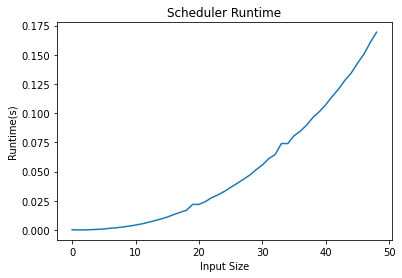

In [307]:
import random
import time 
import matplotlib.pyplot as plt
import numpy as np

runtime = []
num_tests = 10 # #number of tests to run
start_scheduler = 8*60 # #fixed time of starting day
lst_sizes = np.arange(1, 50, 1) #generate lists of size 1 to 100
task_list = []
times = []

for a in range(len(lst_sizes)):
    average_times = []
    for b in range(num_tests):
        task_list_ = []
        for c in range(a):
            task_list.append(Task(
              id = None, 
              description = None,
              duration = random.randint(5,90), # tasks taking anywhere from 5 minutes to 90 minutes 
              dependencies = [],
              start_time = random.choices([None, start_scheduler+random.randint(0, 600)])[0]
            )) 
        # start times randomized to either be none (i.e. flexible task) or fixed at a random hour before 6:30pm

        start = time.time() # start time
        
        task_scheduler = TaskScheduler(task_list)
        task_scheduler.task_scheduler(start_scheduler)
        
        average_times.append(time.time() - start) # included the end time here for efficiency
        
    times.append(sum(average_times)/num_tests) # appends the average time taken into the final times list 
        
plt.plot(runtime, color="blue",  linewidth=1.0)
plt.title('Scheduler Runtime')
plt.xlabel('Input Size')
plt.ylabel('Runtime(s)')
plt.plot(times)
plt.show()